# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 6 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

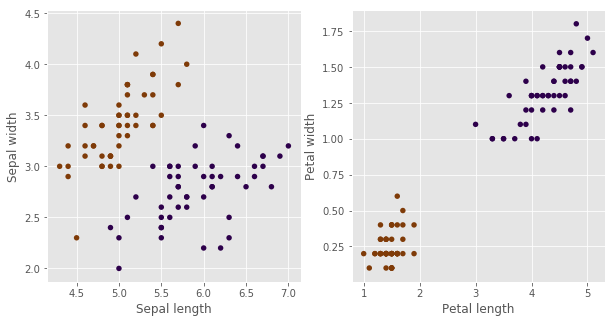

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [6]:
random.seed(901)
import random
from sklearn.base import BaseEstimator
from sklearn.base import ClusterMixin
class myKMeans(BaseEstimator, ClusterMixin): 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        self.init=init
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter   
        
        
    def fit(self, X, y=None):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]+1))
        self.rand=np.array(random.sample(range(X.shape[0]), self.k))
        self.centroids = X[self.rand] 
        
        for itera in range(self.max_iter):
            distances=((X[:,np.newaxis]-self.centroids[np.newaxis,:])**2).sum(axis=2)
            self.labels=distances.argmin(axis=1)
            new_centroids = np.array([X[self.labels== k].mean(axis=0) for k in range(self.centroids.shape[0])])
            D=((new_centroids-self.centroids)**2).sum()
            if(D<0.0001):
                return self
            self.centroids=new_centroids
        return self

    def predict(self, X, y=None):
        return self.labels
    
    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels

In [305]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import KMeans
from __future__ import division

class Clustering(BaseEstimator, ClusterMixin):
    
    def __init__(self, n_clusters=2, **kwargs):
        self.n_clusters = n_clusters
    def mdd(self,x,mu,sigma):
        data = np.empty(x.shape[0])
        if (np.linalg.det(sigma)<0.0001): #Защита от схлопывания
            sigma += np.eye(sigma.shape[0]) * 0.01
        for pts in xrange(x.shape[0]):
            data[pts] = 1 / np.sqrt(np.linalg.det(sigma) * ((2 * pi) ** (x.shape[1]))) * np.exp(-0.5 * (x[pts]-mu).dot(np.linalg.inv(sigma).dot(x[pts]-mu))) 
        return data
    
    def multidimnormdistr(self, x, mu, sigma):#Вставляю сразу весь массив, потому x.shape[1]. Возвращаем (xshape0,)
        if (np.linalg.det(sigma)<0.0001): #Защита от схлопывания
            sigma += np.eye(sigma.shape[0]) * 0.01
            
            print np.sqrt(np.linalg.det(sigma))
        return 1 / np.sqrt(np.linalg.det(sigma)) * (np.exp((-0.5 * (x-mu).dot(np.linalg.inv(sigma))*(x-mu)).sum(axis=1))) 
        
    def expectation(self, X):
        for k in range(self.n_clusters):
            self.gamma[:,k] = self.pie_[k] * self.mdd(X, self.mu[k,:], self.Sigma[:,:,k])##кажется, тут попец, надо нормировать строки
        if(len(list(set(self.gamma.argmax(axis=1))))<self.n_clusters):
                raise ValueError('Dead after ee-step on iteration ')
        self.gamma /= self.gamma.sum(axis = 1)[:,np.newaxis]
        if(isnan(self.gamma).sum()>0):
            raise ValueError('Nans')
        
        
    def maximization(self, X):
        N = self.gamma.sum(axis = 0) #суммируем по всем элементам
        for k in range(self.n_clusters):
            self.mu[k,:] = 1 / N[k] * ((X * self.gamma[:, k, np.newaxis]).sum(axis = 0))
        if(isnan(self.mu).sum()>0):
            raise ValueError('Nans')
        for k in range(self.n_clusters):
            self.Sigma[:,:,k].fill(0)
            for pts in xrange(X.shape[0]):
                self.Sigma[:,:,k] += np.outer((X[pts, :] - self.mu[k, :]) ,(X[pts, :] - self.mu[k, :])) * self.gamma[pts, k]
            self.Sigma[:,:,k] /= N[k]
            self.pie_[k] = N[k] / X.shape[0]
        
        
    def fit(self, X, y=None):
        mu_prev = np.empty((self.n_clusters, X.shape[1]))
        Sigma_prev = np.empty((X.shape[1],X.shape[1],self.n_clusters))
        self.gamma = np.empty((X.shape[0],self.n_clusters))
        #kmeans = myKMeans(k = self.n_clusters, random_state=0).fit(X)
        kmeans = KMeans(n_clusters = self.n_clusters, random_state=0).fit(X)
        self.mu = kmeans.cluster_centers_
        #print np.unique(kmeans.labels_).shape[0]
        if(np.unique(kmeans.labels_).shape[0]<2):
            raise ValueError('All points belong to one centroid')
        mu_prev = kmeans.cluster_centers_.copy()
        self.Sigma = np.empty([X.shape[1], X.shape[1], self.n_clusters])#размерность*размерность*кластеры
        self.pie_ = np.empty(self.n_clusters)
        for k in range(self.n_clusters):
            self.Sigma[:,:,k] = np.transpose(X[kmeans.labels_ == k] - self.mu[k,:]).dot((X[kmeans.labels_ == k] - self.mu[k,:]))
            #self.pie_[k] = X[kmeans.labels_ == k].shape[0] / X.shape[0]
            self.pie_[k] = (kmeans.labels_ == k).sum() / X.shape[0]
        i=0
        while(i < 100):
            self.expectation(X)
            if(len(list(set(self.gamma.argmax(axis=1))))<self.n_clusters):
                raise ValueError('Dead after e-step on iteration ',i)
            self.maximization(X)
            if(len(list(set(self.gamma.argmax(axis=1))))<self.n_clusters):
                raise ValueError('Dead after m-step on iteration ', i)
            #print np.unique(self.mu).shape[0]
            if(np.unique(self.mu).shape[0]<2):
                raise ValueError('All points belong to one centroid')
            dist = ((self.mu - mu_prev)**2).sum() + ((self.Sigma - Sigma_prev)**2).sum() 
            if dist < 0.0001:
                print i
                return self
            mu_prev = self.mu.copy()
            Sigma_prev = self.Sigma
            i+=1
        return self
    
    def predict(self, x):
        print len(list(set(self.gamma.argmax(axis=1))))
        return self.gamma.argmax(axis=1)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

In [306]:
pred_iris = Clustering(n_clusters = 2).fit(x_iris)

3


In [307]:
that_iris = Clustering(n_clusters = 2).fit_predict(x_iris)

3
2


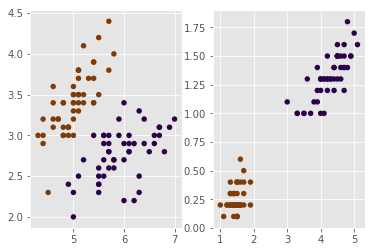

In [308]:
pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=that_iris, cmap=pl.cm.PuOr, lw=0, s=30)
pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=that_iris, cmap=pl.cm.PuOr, lw=0, s=30)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [309]:
pred_iris = Clustering(n_clusters = 2).fit(x_iris)

3


In [310]:
pred_iris = Clustering(n_clusters = 2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

3
2
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [311]:
## Задание 2
def quality(x, y):
    quality_array = np.empty(x.shape[0])
    #if(len(list(set(y)))<2):
     #   raise ValueError('All points belong to one centroid')
    for obj in xrange(x.shape[0]):
        b=100000.0
        if(x[y==y[obj]].shape[0]==1):
            quality_array[obj]=0
            continue
        for cluster in list(set(y)):
            tempdist = np.sqrt(((x[obj]-x[y==cluster])**2).sum(axis=1)).mean(axis=0)
            if(y[obj]==cluster):
                a = tempdist * (x[y==cluster]).shape[0]/((x[y==cluster]).shape[0]-1)
            elif tempdist<b:
                b = tempdist
        #if(x[y==y[obj]].shape[0]==1):
            #a = b
        quality_array[obj] = (b-a)/ max([a,b])
    #quality_array[::-1].sort()
    return quality_array.mean()

In [312]:
quality(x_iris,pred_iris)

0.7369368160680051

Протестируем

In [313]:
from sklearn.metrics import silhouette_score
silhouette_score(x_iris, pred_iris)

0.73693681602317374

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [314]:
x=x_iris
y=pred_iris

In [315]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [316]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #gmm = GaussianMixture(n_components=k).fit(x)
    #y = gmm.predict_proba(x).argmax(axis=1)
    #cls = KMeans(n_clusters = k)
    cls = Clustering(n_clusters = k)
    y = cls.fit_predict(x)
    #criteria[i] = quality(x, y)
    criteria[i] = silhouette_score(x, y)
    print k, criteria[i] #,silhouette_score(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

3
2
2 0.736936816023
13
3
3 0.52874772945
41
4
4 0.303039896945
17
5
5 0.275230598276
14
6
6 0.266624054061
22
7
7 0.227121347022


ValueError: Dead after ee-step on iteration 

In [266]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=10000, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
#plt.scatter(X[:,0], X[:, 1], c=y)

In [267]:
cls = Clustering(n_clusters = 11)
#gmm = GaussianMixture(n_components=16).fit(x)
#y = gmm.predict_proba(x).argmax(axis=1)
#cls = KMeans(n_clusters = 27)
#cls = myKMeans(k=27)
y = cls.fit_predict(x)
print len(list(set(y)))
plt.scatter(x[:,0], x[:, 1], c=y)

ValueError: Dead after ee-step on iteration 

In [255]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters = k)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    #criteria[i] = silhouette_score(x, y)
    print k, criteria[i] #,silhouette_score(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

0.0680510317325
0.0380748821343
0.0253716156565
0.0468372860328
0.024980004842
0.0407991617765
4
2
2 0.736936816068
0.0658361530846
0.0318972258888
0.0438769472039
0.0249972062264
0.0713456755226
0.0373750042968
0.0249509553451
0.0463177757991
0.0374906326492
0.0249799842817
0.0421744578726
4
3
3 0.528591511834
0.0343532261069
0.0492339044707
0.0245467712459
0.0400365642731


ValueError: Dead after ee-step on iteration 

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
## Задание 3
df = pd.read_csv('WDIData.csv', sep=',')

In [84]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [85]:
df.count(axis=0)

Country Name      409992
Country Code      409992
Indicator Name    409992
Indicator Code    409992
1960               38936
1961               42817
1962               44990
1963               45037
1964               45556
1965               48457
1966               48118
1967               49844
1968               49457
1969               51174
1970               93612
1971               99910
1972              102879
1973              102425
1974              103924
1975              108085
1976              110503
1977              114472
1978              114076
1979              114859
1980              119616
1981              121580
1982              123114
1983              122918
1984              123687
1985              124986
                   ...  
1988              126793
1989              128139
1990              154158
1991              153590
1992              158328
1993              159689
1994              161649
1995              171075
1996              171584


Пусть будет 2010й, раз там больше всего данных. Выкинем лишние столбцы

In [86]:
df.columns[4:54]

Index([u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009'],
      dtype='object')

In [87]:
df = df.drop(df.columns[4:54],axis=1)

In [88]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [89]:
df = df.drop(df.columns[5:12],axis=1)

In [90]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,84.006076
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.955345
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,73.734266


In [91]:
df = df.drop(df.columns[1:3],axis=1)

In [92]:
df.head()

,Country Name,Indicator Code,2010
0,Arab World,PA.NUS.PPP.05,NaN
1,Arab World,PA.NUS.PRVT.PP.05,NaN
2,Arab World,EG.CFT.ACCS.ZS,84.006076
3,Arab World,EG.ELC.ACCS.ZS,85.955345
4,Arab World,EG.ELC.ACCS.RU.ZS,73.734266


Сделаем столбцы из индикаторов

In [93]:
df=df.pivot(index='Country Name', columns='Indicator Code',values = '2010')
df.head()

Indicator Code,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,275.819331,4.254972,379100.0,58.067580,7793000.0,0.270561,11.936709,2962000.0,0.180743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,97.322684,12013.0,43.843066,626000.0,0.214897,22.846715,145700.0,2.554745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,457.433490,19.481472,413740.0,17.371334,7502000.0,0.207710,3.149798,2856586.0,0.381654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,49.0,24.500000,3000.0,0.053921,15.000000,NaN,9.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,201.0,42.765957,2500.0,0.029604,5.319149,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь выкинем индикаторы без значений или с малым их числом

In [94]:
df.count(axis=0)

Indicator Code
AG.AGR.TRAC.NO                0
AG.CON.FERT.PT.ZS           123
AG.CON.FERT.ZS              205
AG.LND.AGRI.K2              255
AG.LND.AGRI.ZS              255
AG.LND.ARBL.HA              207
AG.LND.ARBL.HA.PC           253
AG.LND.ARBL.ZS              253
AG.LND.CREL.HA              225
AG.LND.CROP.ZS              243
AG.LND.EL5M.RU.K2           225
AG.LND.EL5M.RU.ZS           223
AG.LND.EL5M.UR.K2           225
AG.LND.EL5M.UR.ZS           223
AG.LND.EL5M.ZS              223
AG.LND.FRST.K2              256
AG.LND.FRST.ZS              256
AG.LND.IRIG.AG.ZS            70
AG.LND.PRCP.MM                0
AG.LND.TOTL.K2              262
AG.LND.TOTL.RU.K2           225
AG.LND.TOTL.UR.K2           225
AG.LND.TRAC.ZS                0
AG.PRD.CREL.MT              225
AG.PRD.CROP.XD              246
AG.PRD.FOOD.XD              248
AG.PRD.LVSK.XD              247
AG.SRF.TOTL.K2              262
AG.YLD.CREL.KG              225
BG.GSR.NFSV.GD.ZS           220
                         

In [95]:
df.count(axis=0).index[(df.count(axis=0)<200)]

Index([u'AG.AGR.TRAC.NO', u'AG.CON.FERT.PT.ZS', u'AG.LND.IRIG.AG.ZS',
       u'AG.LND.PRCP.MM', u'AG.LND.TRAC.ZS', u'BN.CAB.XOKA.CD',
       u'BN.CAB.XOKA.GD.ZS', u'BN.FIN.TOTL.CD', u'BN.GSR.FCTY.CD',
       u'BN.GSR.GNFS.CD',
       ...
       u'per_sa_allsa.cov_q4_tot', u'per_sa_allsa.cov_q5_tot',
       u'per_si_allsi.adq_pop_tot', u'per_si_allsi.ben_q1_tot',
       u'per_si_allsi.cov_pop_tot', u'per_si_allsi.cov_q1_tot',
       u'per_si_allsi.cov_q2_tot', u'per_si_allsi.cov_q3_tot',
       u'per_si_allsi.cov_q4_tot', u'per_si_allsi.cov_q5_tot'],
      dtype='object', name=u'Indicator Code', length=1072)

In [96]:
df = df.drop(df.count(axis=0).index[(df.count(axis=0)<200)],axis=1)

In [97]:
df.count(axis=1)
df.index[(df.count(axis=1)<300)]
#К сожалению, страны с малым числом известных компоент тоже придется выкинуть

Index([u'American Samoa', u'Andorra', u'Bermuda', u'British Virgin Islands',
       u'Cayman Islands', u'Channel Islands', u'Curacao', u'Faroe Islands',
       u'French Polynesia', u'Gibraltar', u'Greenland', u'Guam',
       u'Isle of Man', u'Korea, Dem. People’s Rep.', u'Kosovo',
       u'Liechtenstein', u'Marshall Islands', u'Monaco', u'Nauru',
       u'New Caledonia', u'Northern Mariana Islands', u'Not classified',
       u'Palau', u'San Marino', u'Sint Maarten (Dutch part)', u'Somalia',
       u'South Sudan', u'St. Martin (French part)',
       u'Turks and Caicos Islands', u'Tuvalu', u'Virgin Islands (U.S.)'],
      dtype='object', name=u'Country Name')

In [98]:
df = df.drop(df.count(axis=1).index[(df.count(axis=1)<300)],axis=0)
df = df.drop(df.index[df.index=='World'],axis=0)
df = df.drop(df.index[df.index=='Upper middle income'],axis=0)

In [99]:
df=df.fillna(0)

In [100]:
#Нормируем
df=(df-df.mean(axis=0))/df.std(axis=0)

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
pca.fit(df.values)
PC = pca.transform(df.values)

In [300]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = myKMeans(k = k).fit(df.values)
    #y = cls.labels
    #gmm = GaussianMixture(n_components=k).fit(PC)
    #y = gmm.predict_proba(PC).argmax(axis=1)
    cls = Clustering(n_clusters = k)
    y = cls.fit_predict(PC)
    criteria[i] = quality(PC, y)
    #criteria[i] = silhouette_score(df.values, y)
    print k, criteria[i]#,silhouette_score(df.values, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

/home/vladimir/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


ValueError: Nans

2 0.16675320545
3 0.166786887294
4 0.131613320296
5 0.129131101803
6 0.12154987072
7 0.0712653917657
8 0.0900773374626
9 0.0952989179232
10 0.0769897668406
11 0.0777232455242
12 0.0926828805052
13 0.0977511655174
14 0.087998649081
15 0.0877149584269
16 0.0751576645675
17 0.065563766578
18 0.0762114312797
19 0.0784939236315
20 0.0750551747277


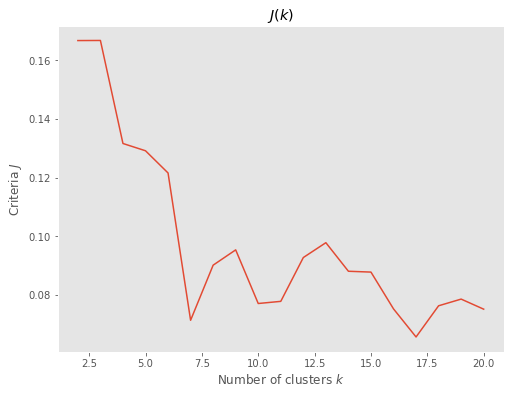

In [173]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = myKMeans(k = k).fit(df.values)
    #y = cls.labels
    gmm = GaussianMixture(n_components=k).fit(df.values)
    y = gmm.predict_proba(df.values).argmax(axis=1)
    criteria[i] = quality(df.values, y)
    #criteria[i] = silhouette_score(df.values, y)
    print k, criteria[i]#,silhouette_score(df.values, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [106]:
gmm = GaussianMixture(n_components=2).fit(df.values)
y = gmm.predict_proba(df.values).argmax(axis=1)
df = df.assign(Type_gaussian_sklearn=y)

In [102]:
cls = myKMeans(k = 2)
y = cls.fit(df.values)
df= df.assign(Type=y.labels)

In [107]:
df.head()

Indicator Code,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,Type,Type_gaussian_sklearn
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.306569,-0.300182,0.958972,0.093416,0.215518,-0.167307,-0.317607,-0.561968,-0.361460,-0.360794,...,-0.439585,-0.529764,-0.322229,0.032019,2.937979,-0.273752,-0.755136,-1.332997,0,1
Albania,-0.129984,-0.373072,0.253978,-0.278180,-0.020330,0.684262,-0.354237,-0.147425,-0.349941,0.336958,...,-0.457194,-0.506583,-0.321485,1.078661,-0.042961,-0.272438,-0.676387,1.003984,1,0
Algeria,-0.277679,-0.293304,-1.058010,0.078328,-0.050781,-0.853161,-0.318978,-0.526886,-0.358090,-0.358293,...,-0.437204,-0.525069,-0.282192,-0.049451,1.778708,-0.270112,0.077145,-1.248116,1,1
Angola,-0.298647,-0.259517,0.402296,-0.098060,-0.187490,-0.842320,-0.331704,-0.552911,-0.347962,-0.342228,...,-0.034033,-0.531857,-0.288432,1.241964,-0.803585,-0.276754,-0.976968,1.803940,0,1
Antigua and Barbuda,-0.308950,-0.375439,-0.905200,-0.310430,-0.751817,-0.389433,-0.356132,-0.196670,-0.361172,0.779674,...,-0.460858,-0.531857,-0.322586,-0.631086,-1.031624,-0.277758,0.297748,1.014944,1,0


In [104]:
df[df.Type==0]

Indicator Code,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,Type
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.306569,-0.300182,0.958972,0.093416,0.215518,-0.167307,-0.317607,-0.561968,-0.361460,-0.360794,...,7.175608,-0.439585,-0.529764,-0.322229,0.032019,2.937979,-0.273752,-0.755136,-1.332997,0
Angola,-0.298647,-0.259517,0.402296,-0.098060,-0.187490,-0.842320,-0.331704,-0.552911,-0.347962,-0.342228,...,0.760244,-0.034033,-0.531857,-0.288432,1.241964,-0.803585,-0.276754,-0.976968,1.803940,0
Bangladesh,0.089433,-0.357108,1.599519,0.093312,-0.713894,3.572712,-0.198830,0.546712,-0.253458,1.014107,...,-0.180718,-0.396159,0.488298,-0.310906,0.091554,2.396881,-0.275779,-0.406767,-1.241153,0
Belize,-0.204569,-0.375145,-1.577834,-0.306748,0.057233,-0.842371,-0.355752,-0.348559,-0.350486,0.504290,...,-0.443517,0.246806,-0.472228,-0.322305,-0.099497,-0.837142,-0.278120,-0.907552,1.700653,0
Benin,-0.297585,-0.368626,-0.406968,-0.178943,0.239028,0.659207,-0.341686,-0.051526,-0.352191,-0.222696,...,0.303061,6.125996,-0.529191,-0.322208,0.181707,-0.073503,-0.278062,0.512316,0.189130,0
Bhutan,-0.295593,-0.374424,-1.242832,-0.305421,-0.345066,-0.893011,-0.355371,-0.536723,-0.361460,-0.360794,...,-0.546827,-0.460858,-0.531857,-0.322586,1.187174,-1.308142,-0.278784,0.897687,0.863526,0
Bolivia,-0.300876,-0.300965,-0.202578,-0.087845,0.904806,-0.789407,-0.343893,-0.558228,-0.361460,-0.360794,...,-0.535584,-0.457768,-0.525090,-0.317664,0.840535,0.405104,-0.277188,-0.676980,0.272867,0
Botswana,-0.156918,-0.324107,0.342639,-0.297208,-0.386209,-1.063344,-0.354371,-0.592913,-0.361460,-0.360794,...,-0.546827,-0.460858,-0.531857,-0.322586,-0.333432,-0.703259,-0.276542,-1.052950,1.767406,0
Burkina Faso,-0.296753,-0.351471,0.269292,0.000452,0.698228,0.612695,-0.300314,-0.542471,-0.361460,-0.360794,...,0.076131,0.693100,2.917692,-0.322165,1.658562,1.194320,-0.278275,-0.267836,-0.426198,0


In [105]:
df[df.Type==1]

Indicator Code,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,Type
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,-0.129984,-0.373072,0.253978,-0.278180,-0.020330,0.684262,-0.354237,-0.147425,-0.349941,0.336958,...,-0.544546,-0.457194,-0.506583,-0.321485,1.078661,-0.042961,-0.272438,-0.676387,1.003984,1
Algeria,-0.277679,-0.293304,-1.058010,0.078328,-0.050781,-0.853161,-0.318978,-0.526886,-0.358090,-0.358293,...,-0.151693,-0.437204,-0.525069,-0.282192,-0.049451,1.778708,-0.270112,0.077145,-1.248116,1
Antigua and Barbuda,-0.308950,-0.375439,-0.905200,-0.310430,-0.751817,-0.389433,-0.356132,-0.196670,-0.361172,0.779674,...,-0.546827,-0.460858,-0.531857,-0.322586,-0.631086,-1.031624,-0.277758,0.297748,1.014944,1
Arab World,-0.196833,0.635643,-0.066175,-0.310637,-0.244627,-0.768150,0.005586,-0.490861,0.230402,-0.284089,...,1.040462,-0.226084,-0.122688,0.284032,-0.930028,-0.458011,0.113276,0.377418,0.335118,1
Argentina,-0.240301,-0.082617,0.751937,1.658608,2.972874,-0.015747,-0.248114,-0.529723,-0.157634,-0.233182,...,-0.210373,-0.237366,-0.390904,-0.274846,-0.049784,0.984789,-0.245107,-0.344713,-0.022826,1
Armenia,-0.268720,-0.372012,1.101401,-0.287383,-0.270410,0.130603,-0.354108,-0.255579,-0.361460,-0.360794,...,-0.465758,-0.451273,-0.453559,-0.321849,0.239000,-0.456567,-0.276383,-0.331612,1.038827,1
Aruba,-0.314642,-0.375453,-1.368278,-0.310533,-0.847508,-0.231748,-0.356133,-0.593529,-0.361422,-0.001009,...,-0.535571,-0.460858,0.719687,-0.322497,-0.894368,-0.621701,-0.274985,-1.077348,1.687303,1
Australia,-0.226762,0.415967,0.652447,1.896435,7.255613,-0.666514,-0.103188,-0.584437,0.033404,-0.272404,...,0.554981,-0.325073,-0.464740,-0.172739,0.202021,-0.255452,-0.161620,-0.485350,0.954951,1
Austria,-0.108800,-0.369938,-0.250797,-0.239926,-0.239934,0.190179,-0.345333,-0.455435,-0.361460,-0.360794,...,-0.444410,-0.390936,-0.413384,-0.214657,-0.161979,0.204389,-0.144881,0.299099,-0.084456,1


Страны разделились на:
- страны Европы, Северной Америки и прочие более-менее цивилизованные
- страны Африки и другие страны 3го мира

In [108]:
df[df.Type_gaussian_sklearn==0]

Indicator Code,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,Type,Type_gaussian_sklearn
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,-0.129984,-0.373072,0.253978,-0.278180,-0.020330,0.684262,-0.354237,-0.147425,-0.349941,0.336958,...,-0.457194,-0.506583,-0.321485,1.078661,-0.042961,-0.272438,-0.676387,1.003984,1,0
Antigua and Barbuda,-0.308950,-0.375439,-0.905200,-0.310430,-0.751817,-0.389433,-0.356132,-0.196670,-0.361172,0.779674,...,-0.460858,-0.531857,-0.322586,-0.631086,-1.031624,-0.277758,0.297748,1.014944,1,0
Argentina,-0.240301,-0.082617,0.751937,1.658608,2.972874,-0.015747,-0.248114,-0.529723,-0.157634,-0.233182,...,-0.237366,-0.390904,-0.274846,-0.049784,0.984789,-0.245107,-0.344713,-0.022826,1,0
Armenia,-0.268720,-0.372012,1.101401,-0.287383,-0.270410,0.130603,-0.354108,-0.255579,-0.361460,-0.360794,...,-0.451273,-0.453559,-0.321849,0.239000,-0.456567,-0.276383,-0.331612,1.038827,1,0
Aruba,-0.314642,-0.375453,-1.368278,-0.310533,-0.847508,-0.231748,-0.356133,-0.593529,-0.361422,-0.001009,...,-0.460858,0.719687,-0.322497,-0.894368,-0.621701,-0.274985,-1.077348,1.687303,1,0
Australia,-0.226762,0.415967,0.652447,1.896435,7.255613,-0.666514,-0.103188,-0.584437,0.033404,-0.272404,...,-0.325073,-0.464740,-0.172739,0.202021,-0.255452,-0.161620,-0.485350,0.954951,1,0
Austria,-0.108800,-0.369938,-0.250797,-0.239926,-0.239934,0.190179,-0.345333,-0.455435,-0.361460,-0.360794,...,-0.390936,-0.413384,-0.214657,-0.161979,0.204389,-0.144881,0.299099,-0.084456,1,0
"Bahamas, The",-0.314642,-0.375427,-1.844697,-0.310170,-0.825176,-1.028836,-0.356131,-0.523752,-0.302896,7.583031,...,-0.364705,-0.341052,-0.320578,-0.515294,-0.968762,-0.272644,-0.987491,1.941210,1,0
Bahrain,2.951234,-0.375440,-1.359606,-0.310554,-0.925394,-0.935122,-0.356133,0.093943,-0.360711,1.577595,...,-0.157234,4.445349,-0.301629,-0.108183,0.013883,-0.268078,-0.116165,-0.233417,1,0


In [109]:
df[df.Type_gaussian_sklearn==1]

Indicator Code,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,Type,Type_gaussian_sklearn
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.306569,-0.300182,0.958972,0.093416,0.215518,-0.167307,-0.317607,-0.561968,-0.361460,-0.360794,...,-0.439585,-0.529764,-0.322229,0.032019,2.937979,-0.273752,-0.755136,-1.332997,0,1
Algeria,-0.277679,-0.293304,-1.058010,0.078328,-0.050781,-0.853161,-0.318978,-0.526886,-0.358090,-0.358293,...,-0.437204,-0.525069,-0.282192,-0.049451,1.778708,-0.270112,0.077145,-1.248116,1,1
Angola,-0.298647,-0.259517,0.402296,-0.098060,-0.187490,-0.842320,-0.331704,-0.552911,-0.347962,-0.342228,...,-0.034033,-0.531857,-0.288432,1.241964,-0.803585,-0.276754,-0.976968,1.803940,0,1
Arab World,-0.196833,0.635643,-0.066175,-0.310637,-0.244627,-0.768150,0.005586,-0.490861,0.230402,-0.284089,...,-0.226084,-0.122688,0.284032,-0.930028,-0.458011,0.113276,0.377418,0.335118,1,1
Azerbaijan,-0.295754,-0.365992,0.939284,-0.212950,-0.049179,0.680185,-0.343717,-0.113127,-0.361460,-0.360794,...,-0.452830,-0.500724,-0.307610,4.229249,0.894802,-0.272798,0.375533,-0.419937,1,1
Bangladesh,0.089433,-0.357108,1.599519,0.093312,-0.713894,3.572712,-0.198830,0.546712,-0.253458,1.014107,...,-0.396159,0.488298,-0.310906,0.091554,2.396881,-0.275779,-0.406767,-1.241153,0,1
Belize,-0.204569,-0.375145,-1.577834,-0.306748,0.057233,-0.842371,-0.355752,-0.348559,-0.350486,0.504290,...,0.246806,-0.472228,-0.322305,-0.099497,-0.837142,-0.278120,-0.907552,1.700653,0,1
Benin,-0.297585,-0.368626,-0.406968,-0.178943,0.239028,0.659207,-0.341686,-0.051526,-0.352191,-0.222696,...,6.125996,-0.529191,-0.322208,0.181707,-0.073503,-0.278062,0.512316,0.189130,0,1
Bhutan,-0.295593,-0.374424,-1.242832,-0.305421,-0.345066,-0.893011,-0.355371,-0.536723,-0.361460,-0.360794,...,-0.460858,-0.531857,-0.322586,1.187174,-1.308142,-0.278784,0.897687,0.863526,0,1


In [47]:
## Задание 4

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.